In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib
import plotly.offline as pyo
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


In [2]:
# Load data
data = pd.read_csv("/content/drive/MyDrive/ekinox/data/student_data.csv", delimiter=",")

In [36]:
data.columns

Index(['StudentID', 'FirstName', 'FamilyName', 'school', 'sex', 'age',
       'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'FinalGrade', 'complexity', 'cluster'],
      dtype='object')

In [37]:
# Sélection des variables pertinentes pour le clustering
categorical_features = ['internet', 'higher','traveltime', 'studytime', 'failures','Dalc', 'Walc', 'health', 'absences']
X = data[categorical_features]
le = LabelEncoder()

# appliquer le LabelEncoder à toutes les colonnes catégorielles
X[categorical_features] = X[categorical_features].apply(lambda col: le.fit_transform(col))
X

<ipython-input-37-630c492c7ab3>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,internet,higher,traveltime,studytime,failures,Dalc,Walc,health,absences
0,0,1,1,1,0,0,0,2,6
1,1,1,0,1,0,0,0,2,4
2,1,1,0,1,3,1,2,2,10
3,1,1,0,2,0,0,0,4,2
4,0,1,0,1,0,0,1,4,4
...,...,...,...,...,...,...,...,...,...
352,0,1,0,1,2,3,4,3,11
353,1,1,1,0,0,2,3,1,3
354,0,1,0,0,3,2,2,2,3
355,1,1,2,0,0,2,3,4,0


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Centrage et mise à l'échelle des données
data_scaled = (X_scaled - X_scaled.mean()) / X_scaled.std()

# Création d'une instance de PCA avec 2 composantes principales
pca = PCA(n_components=2)

# Application de l'analyse en composantes principales aux données
pca.fit(data_scaled)

# variance sur les deux premières composantes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Affichage des charges des variables
loadings_df = pd.DataFrame(loadings, index=categorical_features, columns=['PC1', 'PC2'])
print(loadings_df)

# Affichage des corrélations des variables avec les composantes principales
corr_df = pd.DataFrame(pca.transform(data_scaled), columns=['PC1', 'PC2'])
corr_df = pd.concat([corr_df, data['FinalGrade']], axis=1)
corr_matrix = corr_df.corr()
print(corr_matrix['FinalGrade'])

                 PC1       PC2
internet   -0.059929 -0.563074
higher     -0.363798 -0.592842
traveltime  0.356095  0.284309
studytime  -0.500723 -0.123118
failures    0.509303  0.438964
Dalc        0.750848 -0.399145
Walc        0.781680 -0.357236
health      0.184729 -0.045393
absences    0.344947 -0.140740
PC1          -0.308257
PC2          -0.112579
FinalGrade    1.000000
Name: FinalGrade, dtype: float64


In [46]:
cols= X.columns
complexity1 = X["internet"]*(-0.56) +X["higher"]*(-0.6)+X["failures"]*(0.44)
complexity2 = X["studytime"]*(-0.5)+X["failures"]*(0.5)+X["Walc"]*(0.75)+X["Dalc"]*(0.78)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

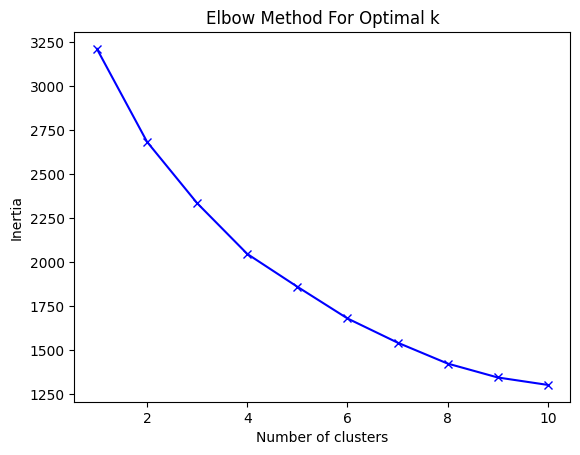

In [13]:
# Create empty list of inertia values
inertias = []

# Set range of k values to test
k_range = range(1, 11)

# For each value of k, perform k-means clustering and record the inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Plot the elbow curve
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
# Application de l'algorithme k-means avec le nombre optimal de clusters
n_clusters =  3 # À déterminer à partir de la méthode du coude
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Calcul de la complexité d'accompagner l'élève pour améliorer son niveau scolaire
data['cluster'] = labels
complexity = data.groupby('cluster').mean()['FinalGrade'].round(1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-51-8f60dd8d4ab9>:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [50]:
complexity

cluster
0    12.0
1    10.0
2    10.0
Name: FinalGrade, dtype: float64

In [26]:
data

,StudentID,FirstName,FamilyName,school,sex,age,address,famsize,Pstatus,Medu,...,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade,complexity,cluster
0,0,Rafael,Morais,GP,F,18,U,GT3,A,4,...,4,3,4,1,1,3,6,6,0,0
1,1,Lara,Braga,GP,F,17,U,GT3,T,1,...,5,3,3,1,1,3,4,6,0,0
2,2,Gonçalo,Azevedo,GP,F,15,U,LE3,T,1,...,4,3,2,2,3,3,10,10,2,1
3,3,Lara,Perna,GP,F,15,U,GT3,T,4,...,3,2,2,1,1,5,2,15,0,0
4,4,João,Pires,GP,F,16,U,GT3,T,3,...,4,3,2,1,2,5,4,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,390,Alice,Barcellos,MS,M,20,U,LE3,A,2,...,5,5,4,4,5,4,11,9,2,1
353,391,Rodrigo,Quintal,MS,M,17,U,LE3,T,3,...,2,4,5,3,4,2,3,16,2,1
354,392,Carolina,Hiza,MS,M,21,R,GT3,T,1,...,5,5,3,3,3,3,3,7,2,1
355,393,Benedita,Amaral,MS,M,18,R,LE3,T,3,...,4,4,1,3,4,5,0,10,2,1


In [18]:
# Enregistrement du modèle
joblib.dump(kmeans, '/content/drive/MyDrive/ekinox/notebooks/02_models/kmeans_model.joblib')

['/content/drive/MyDrive/ekinox/notebooks/02_models/kmeans_model.joblib']

On décide de définir la complexité en fonction de la mesure de l'implication scolaire et sociale des étudiants comme suit :

data["complexity12"]= data["studytime"]*(-0.5)+data["failures"]*(0.5)+ data["failures"] * 0.44 +data["Walc"]*(0.75)+data["Dalc"]*(0.78) + data["internet"] * (-0.56) + data["higher"] * (-0.6)


In [67]:
conv = ["internet", "higher", "failures", "studytime", "Walc", "Dalc"]
data[conv] = X[conv].apply(lambda col: le.fit_transform(col))
data["complexity1"] = data["internet"] * (-0.56) + data["higher"] * (-0.6) + data["failures"] * 0.44
data["complexity2"]= data["studytime"]*(-0.5)+data["failures"]*(0.5)+data["Walc"]*(0.75)+data["Dalc"]*(0.78)
data["Complexidade"]= data["studytime"]*(-0.5)+data["failures"]*(0.5)+ data["failures"] * 0.44 +data["Walc"]*(0.75)+data["Dalc"]*(0.78) + data["internet"] * (-0.56) + data["higher"] * (-0.6)

In [68]:
data[["internet", "higher", "failures", "studytime", "Walc", "Dalc", "FinalGrade", "complexity1", "complexity2","Complexidade"]].sort_values("Complexidade")

,internet,higher,failures,studytime,Walc,Dalc,FinalGrade,complexity1,complexity2,Complexidade
94,1,1,0,3,0,0,14,-1.16,-1.50,-2.66
47,1,1,0,3,0,0,20,-1.16,-1.50,-2.66
306,1,1,0,3,0,0,17,-1.16,-1.50,-2.66
71,1,1,0,3,0,0,10,-1.16,-1.50,-2.66
186,1,1,0,3,0,0,11,-1.16,-1.50,-2.66
...,...,...,...,...,...,...,...,...,...,...
149,0,0,3,1,4,0,7,1.32,4.00,5.32
138,1,1,3,0,4,1,10,0.16,5.28,5.44
315,1,1,1,0,4,4,13,-0.72,6.62,5.90
352,0,1,2,1,4,3,9,0.28,5.84,6.12


In [70]:
import plotly.express as px
import pandas as pd

# Création de la figure interactive
fig = px.scatter(data, x="FinalGrade", y="Complexidade", color="school", hover_name="FamilyName", size="absences")

# Ajout du titre à la figure
fig.update_layout(
    title={
        'text': "Priorização dos alunos a serem acompanhados com base na complexidade e valor do acompanhamento.",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

# Affichage de la figure
fig.show()

In [71]:
from plotly.offline import plot
plot(fig, filename='/content/drive/MyDrive/ekinox/notebooks/02_models/complexidade.html', auto_open=False)

'/content/drive/MyDrive/ekinox/notebooks/02_models/complexidade.html'

In [59]:
# import plotly.express as px
# import pandas as pd

# # Création de la figure interactive
# fig = px.scatter(data, x="FinalGrade", y="complexity2", color="school", hover_name="FamilyName", size="absences")

# # Affichage de la figure
# fig.show()